Generate dataset using make_blobs function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).
Explore and analyse raw data.
Do preprocessing for classification.
Split your dataset into train and test test (0.7 for train and 0.3 for test).
Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=2000, n_features=3, cluster_std=5.5, random_state=42)

In [3]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [4]:
X_train.shape

(1600, 3)

PLOTS

In [5]:
sns.set_style("whitegrid")

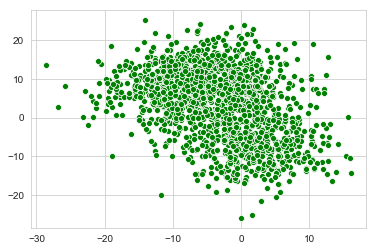

In [6]:
sns.scatterplot(X_train.T[0], X_train.T[1],color='g')

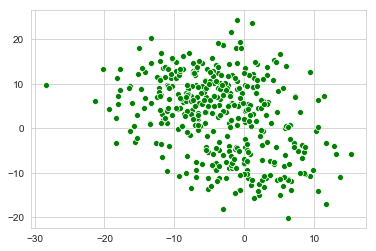

In [7]:
sns.scatterplot(X_test.T[0], X_test.T[1],color='g')

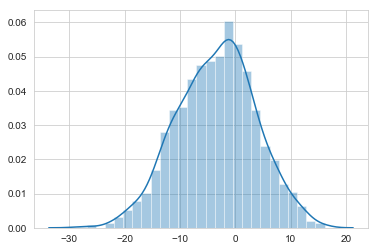

In [8]:
sns.distplot(X_train.T[0])

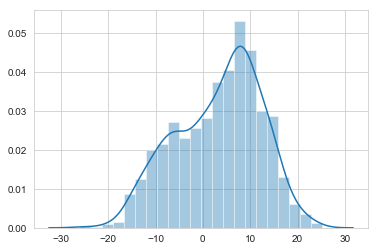

In [14]:
sns.distplot(X_train.T[1])

Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

Model

In [16]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=1)

In [17]:
model.fit(X_train_n)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Score

In [18]:
# model score, Opposite of the value of X on the K-means objective.
print("Train score:", model.score(X_train_n))
print("Test score:",model.score(X_test_n))

Train score: -4800.000000000004
Test score: -1151.3039028753697


In [19]:
train=[]
test=[]

for n in range(1, 10):
    model = KMeans(n_clusters=n)
    model.fit(X_train_n, y_train)
    
    train.append(model.score(X_train_n, y_train))
    test.append(model.score(X_test_n, y_test))

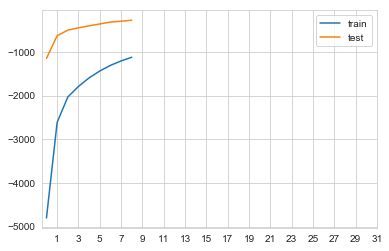

In [20]:
plt.plot(train)
plt.plot(test)
plt.legend(("train", "test"))
plt.xticks(range(1, 33, 2))
plt.show()

In [21]:
var = []

for n in range(1, 10):
    model = KMeans(n_clusters=n)
    model.fit(X_train_n)
    
    var.append(model.inertia_) 

In [22]:
var

[4800.000000000004,
 2615.0372899529557,
 2035.2483812946248,
 1792.0679667433346,
 1595.1764181387314,
 1440.2574910398278,
 1306.4752940195567,
 1208.411845383051,
 1121.0977153425922]

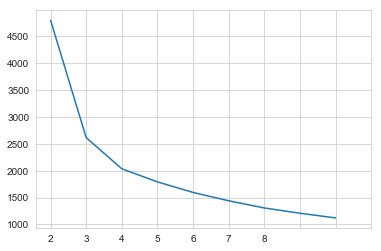

In [23]:
#Elbow Method
plt.plot(var)
plt.xticks(range(10), range(2,9))
plt.show()

In [24]:
import xgboost as xgb

In [25]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [26]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[14:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.9351506 , 0.01051665, 0.05433267],
       [0.01988646, 0.8802726 , 0.09984093],
       [0.8573036 , 0.01172553, 0.13097088],
       [0.00162568, 0.9964528 , 0.00192149],
       [0.7813123 , 0.00760051, 0.21108715],
       [0.02275103, 0.29654118, 0.68070775],
       [0.22635898, 0.01633022, 0.75731075],
       [0.8077176 , 0.02489861, 0.16738378],
       [0.73780626, 0.13057831, 0.13161542],
       [0.6139626 , 0.01060855, 0.37542886]], dtype=float32)

In [28]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [29]:
best_preds

array([0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0,
       2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 2,
       0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2,

In [38]:
from sklearn.metrics import confusion_matrix

NameError: name 'categories' is not defined

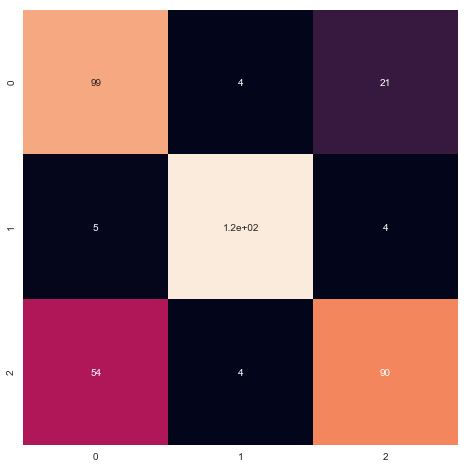

In [39]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [41]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.001,0.01,0.1,1],
    'n_estimators': [200,500,1000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=2,n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

C:\ProgramData\Anaconda3\Anaconda3shell\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1000}
Mean of the cv scores is 0.809375
Train Score 0.836250
Test Score 0.777500
Seconds used for refitting the best model on the train dataset: 5.474414
